In [1]:
import pandas as pd

In [36]:
df_Boris = pd.read_csv('data/Boris/Boris_anotirano_v2.csv')
boris_columns = df_Boris.columns

df_Branislav = pd.read_csv('data/Branislav/annotation_matrix_Branislav.csv', names=boris_columns, header=0)
df_Zorana = pd.read_csv('data/Zorana/annotation_matrix_Zorana_konacno.csv', names=boris_columns, header=0)
df_Nikola = pd.read_csv('data/Nikola/anotaciona_konacna2_Nikola.csv', names=boris_columns, header=0)

In [37]:
column_rename = {
    column_nikola: column_original
    for column_original, column_nikola in zip(df_Boris.columns, df_Nikola.columns)
} 
df_Nikola.rename(columns=column_rename, inplace=True)
    

In [38]:
df_merged = df_Boris.append(
    df_Branislav
).append(
    df_Zorana
).append(
    df_Nikola
)

df_merged = df_merged.dropna()

In [68]:
df_merged.head()

,pair_id,comment,Komentar,code,upit\n,pretvaranje int u string\n,red sa prioritetom\n,pretvaranje string u datum\n,sortiranje string liste\n,čuvanje liste u datoteku\n,...,slanje binarnih podataka preko seriske veze\n,otpakovanje podataka iz tekstualne datoteke\n,pozicije podstingova u stringu\n,čitanje elemenata iz html-a - <td>\n,oduzimanje medijana iz svake kolone\n,uklanjanja zaglavlja prilikom spajanja nekoliko datoteka\n,parsiranje query stringa u url-u\n,rangiranje fazi članova na osnovu stepena podudaranja\n,izlaz u html datoteku\n,kako efikasno pročitati .csv datoteku
0,BookStackApp_BookStack_ActivityService_740,Get a new activity instance for the current u...,Daj novu instancu aktivnosti za trenutnog kori...,protected function newActivityForUser(stri...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,BookStackApp_BookStack_CommentRepo_753,Update an existing comment.\n,Osveži postojeći komentar.,"public function update(Comment $comment, s...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BookStackApp_BookStack_CommentRepo_754,Delete a comment from the system.\n,Obriši komentar iz sistema.,public function delete(Comment $comment) ...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BookStackApp_BookStack_Comment_747,Check if a comment has been updated since cre...,Provera da li je komentar menjan od kada je na...,public function isUpdated(): bool { ...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BookStackApp_BookStack_helpers_731,Check if current user is a signed in user.\n,Provera da li je korisnik prijavljen,function signedInUser(): bool{ return auth(...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
df_merged.to_csv('./data/annotation_merged.csv')

In [40]:
len(df_merged)

1556

In [146]:
descriptive_columns = ['pair_id', 'comment', 'Komentar', 'code']
queries = df_merged.drop(columns=descriptive_columns, inplace=False)
queries.head(1)

,upit\n,pretvaranje int u string\n,red sa prioritetom\n,pretvaranje string u datum\n,sortiranje string liste\n,čuvanje liste u datoteku\n,postgresql konekcija\n,konfuziona matrica\n,postavljanje radnog direktorijuma\n,grupisanje po izbrojanim podacima\n,...,slanje binarnih podataka preko seriske veze\n,otpakovanje podataka iz tekstualne datoteke\n,pozicije podstingova u stringu\n,čitanje elemenata iz html-a - <td>\n,oduzimanje medijana iz svake kolone\n,uklanjanja zaglavlja prilikom spajanja nekoliko datoteka\n,parsiranje query stringa u url-u\n,rangiranje fazi članova na osnovu stepena podudaranja\n,izlaz u html datoteku\n,kako efikasno pročitati .csv datoteku
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
query_count = queries.fillna(0).astype(bool).sum(axis=0)

In [9]:
rare_queries = query_count[query_count < 1]
len(rare_queries)

16

In [10]:
rare_queries.to_csv('Retki upiti.csv')

/Users/boris_majic/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [11]:
not_so_rare = rare_queries[rare_queries > 2]
not_so_rare.to_csv('Ne toliko retki upiti.csv')

/Users/boris_majic/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


In [12]:
query_count.to_csv('Upiti.csv')

/Users/boris_majic/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [270]:
for key in query_count.keys():
    query_count[key.strip().lower()] = query_count.pop(key)
query_count.pop('upit')

72

In [14]:
import seaborn as sns

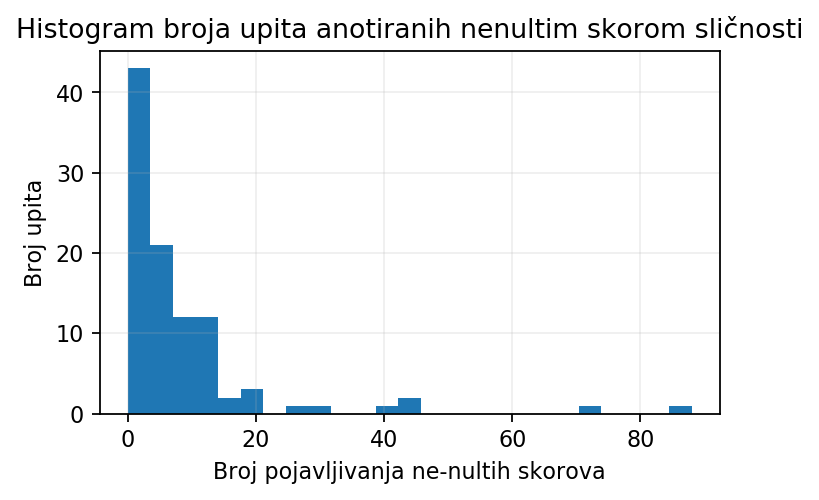

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 3), dpi=160)
plt.hist(query_count.values, bins = 25)
plt.xlabel('Broj pojavljivanja ne-nultih skorova')
plt.ylabel('Broj upita')
plt.title('Histogram broja upita anotiranih nenultim skorom sličnosti')
plt.grid(alpha=0.2)

plt.show()

In [11]:
len(df_merged.columns)

104

In [12]:
df_merged.isna()

,pair_id,comment,Komentar,code,upit\n,pretvaranje int u string\n,red sa prioritetom\n,pretvaranje string u datum\n,sortiranje string liste\n,čuvanje liste u datoteku\n,...,slanje binarnih podataka preko seriske veze\n,otpakovanje podataka iz tekstualne datoteke\n,pozicije podstingova u stringu\n,čitanje elemenata iz html-a - <td>\n,oduzimanje medijana iz svake kolone\n,uklanjanja zaglavlja prilikom spajanja nekoliko datoteka\n,parsiranje query stringa u url-u\n,rangiranje fazi članova na osnovu stepena podudaranja\n,izlaz u html datoteku\n,kako efikasno pročitati .csv datoteku
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
228,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
229,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
230,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Priprema za klasifikaciju

In [69]:
# Transformisanje podataka u oblik prigodan za klasifikaciju

lista_uzoraka = []
upiti = [column.strip() for column in df_upiti.columns]

for i, row in df_merged.iterrows():
    for upitid, upit in enumerate(upiti):
        lista_uzoraka.append([row['pair_id'], upitid, row['Komentar'], column.strip(), row[column]])
        
df_uzorci = pd.DataFrame(
    lista_uzoraka, columns = ['PairID', 'QueryID','Komentar', 'Upit', 'Vrednost']
).astype(
    {
        'PairID': str,
        'QueryID': int,
        'Komentar': str,
        'Upit': str,
        'Vrednost': int
    }
)

df_uzorci.head(3)

,PairID,Komentar,Upit,Vrednost
0,BookStackApp_BookStack_ActivityService_740,Daj novu instancu aktivnosti za trenutnog kori...,upit,0
1,BookStackApp_BookStack_ActivityService_740,Daj novu instancu aktivnosti za trenutnog kori...,pretvaranje int u string,0
2,BookStackApp_BookStack_ActivityService_740,Daj novu instancu aktivnosti za trenutnog kori...,red sa prioritetom,0


## Predobrada podataka

### Normalizacija tekstova na mala slova

In [70]:
df_uzorci['Komentar'] = df_uzorci['Komentar'].apply(lambda x: x.lower())
df_uzorci['Upit'] = df_uzorci['Upit'].apply(lambda x: x.lower())

### Stemovanje reči

Stemovanje se vrši stemerom za hrvatski jezik

In [71]:
import re
import sys
from Croatian_stemmer import Croatian_stemmer as stemmer

In [72]:
pravila=[
    re.compile(r'^('+osnova+')('+nastavak+r')$') 
    for osnova, nastavak in [e.strip().split(' ') for e in open('Croatian_stemmer/rules.txt')]
]

transformacije = [e.strip().split('\t') for e in open('Croatian_stemmer/transformations.txt')]

stop = set(['biti','jesam','budem','sam','jesi','budeš','si','jesmo','budemo','smo','jeste','budete','ste','jesu','budu','su','bih','bijah','bjeh','bijaše','bi','bje','bješe','bijasmo','bismo','bjesmo','bijaste','biste','bjeste','bijahu','biste','bjeste','bijahu','bi','biše','bjehu','bješe','bio','bili','budimo','budite','bila','bilo','bile','ću','ćeš','će','ćemo','ćete','želim','želiš','želi','želimo','želite','žele','moram','moraš','mora','moramo','morate','moraju','trebam','trebaš','treba','trebamo','trebate','trebaju','mogu','možeš','može','možemo','možete'])

def tokenize(text):
    new_text = ''

    for token in re.findall(r'\w+',text ,re.UNICODE):
        if token.lower() in stop:
            try:
                new_text += token.lower() + ' '
            except TypeError:
                print(type(token))
                print(token)
                raise(TypeError)
            continue
        new_text += stemmer.korjenuj(
            stemmer.transformiraj(token.lower(), transformacije), pravila
        ) + ' '
    return new_text


In [126]:
df_uzorci['Stem'] = df_uzorci['Komentar'].apply(lambda x: tokenize(x))
df_uzorci['StemUpit'] = df_uzorci['Upit'].apply(lambda x: tokenize(x))

In [127]:
df_uzorci.head()

,PairID,Komentar,Upit,Vrednost,Stem,StemUpit,ZajednickeStem,ZajednickeOriginal,Bigrami,BrojReciStem,BrojReciUpit
0,BookStackApp_BookStack_ActivityService_740,daj novu instancu aktivnosti za trenutnog kori...,upit,0,daj nov instanc aktivnost za trenutn korisnik,upi,0,0,0,3,1
1,BookStackApp_BookStack_ActivityService_740,daj novu instancu aktivnosti za trenutnog kori...,pretvaranje int u string,0,daj nov instanc aktivnost za trenutn korisnik,pretvaranj int u string,0,0,0,3,4
2,BookStackApp_BookStack_ActivityService_740,daj novu instancu aktivnosti za trenutnog kori...,red sa prioritetom,0,daj nov instanc aktivnost za trenutn korisnik,red sa prioritet,0,0,0,3,2
3,BookStackApp_BookStack_ActivityService_740,daj novu instancu aktivnosti za trenutnog kori...,pretvaranje string u datum,0,daj nov instanc aktivnost za trenutn korisnik,pretvaranj string u datum,0,0,0,3,4
4,BookStackApp_BookStack_ActivityService_740,daj novu instancu aktivnosti za trenutnog kori...,sortiranje string liste,0,daj nov instanc aktivnost za trenutn korisnik,sortiranj string list,0,0,0,3,3


### Filtriranje po frekvenciji reci

Filtriranje se vrši tako što se pravi rečnik svih reči koje se pojavljuju. Zatim se prolazi kroz sve komentare i upite i gleda se koliko se reči u njima pojavljuju. Postavlja se pitanje, da li izbacivati samo one reči koje su jako česte i samim time ne donose veliku informaciju ili reči koje se pojavljuju jako retko i samim time nose veliku količinu informacije. Odlučeno je da se jako retke reči neće izbacivati zbog prirode upita, koji mogu da se sastoje i samo iz jedne, česte i vrlo specifične reči, te bi izbacivanje ovakvih reči onemogućilo pretragu ovakvih upita. Upiti koji koriste isključivo jako česte reči su sami po sebi neodređeni.

Rečnik se pravi na osnovu stemova.

In [128]:
word_dict = {}
for _, row in df_merged.iterrows():
    try:
        for word in tokenize(row['Komentar']).split(' '):
            if word.isnumeric() or len(word) < 2:
                continue
            if not word in word_dict:
                word_dict[word] = 1
            else:
                word_dict[word] += 1
    except:
        continue

for query in df_merged.columns:
    try:
        for word in tokenize(query).split(' '):
            if word.isnumeric() or len(word) < 2:
                continue
            if not word in word_dict:
                word_dict[word] = 1
            else:
                word_dict[word] += 1
    except:
        continue
    
query_word_dict = {}
for query in df_merged.columns:
    for word in tokenize(query).split(' '):
        if word.isnumeric() or len(word) < 2:
            continue
        if not word in query_word_dict:
            query_word_dict[word] = 1
        else:
            query_word_dict[word] += 1

In [129]:
# Koliko imamo jedinstvenih reči
len(word_dict)

3067

In [130]:
word_lengths = list(word_dict.values())
word_lengths.sort()

In [131]:
# Izdvajanje retkih i čestih reči
rare_words = [word for word in word_dict.keys() if word_dict[word] <= word_lengths[round(0.1*len(word_dict))]]
common_words = [word for word in word_dict.keys() if word_dict[word] >= word_lengths[round(0.95*len(word_dict))]]

# One česte reči koje su delovi upita zadržavamo i koje imaju više od dva slova. Veznike ipak želimo da izbacimo
common_words = [word for word in common_words if word not in query_word_dict or len(word) < 3]

In [132]:
common_words[:10]

['nov', 'instanc', 'za', 'korisnik', 'iz', 'prover', 'da', 'li', 'je', 'od']

In [133]:
def broj_istih_reci_bez_ponavljanja(tekst1, tekst2):
    reci_tekst1 = set(tekst1.strip().split(' '))
    reci_tekst2 = set(tekst2.strip().split(' '))
    word_counter = 0
    for rec in reci_tekst1:
        if rec in reci_tekst2:
            word_counter += 1
#             print("{} - {} - {}".format(tekst1, tekst2, rec))
    return word_counter

In [134]:
def broj_istih_reci_sa_ponavljanjem(tekst1, tekst2):
    reci_tekst1 = set(tekst1.strip().split(' '))
    reci_tekst2 = tekst2.strip().split(' ')
    word_counter = 0
    for rec in reci_tekst2:
        if rec in reci_tekst1:
            word_counter += 1
    return word_counter

In [135]:
def broj_zajednickih_bigrama(tekst1, tekst2):
    reci_t1 = tekst1.strip().split(' ')
    bigrami_t1 = [reci_t1[i] + ' ' + reci_t1[i+1] for i in range(len(reci_t1)-1)]
    reci_t2 = tekst2.strip().split(' ')
    bigrami_t2 = [reci_t2[i] + ' ' + reci_t2[i+1] for i in range(len(reci_t2)-1)]
    counter = 0
    for bigram in bigrami_t1:
        if bigram in bigrami_t2:
            counter += 1
            
    return counter

In [136]:
def ukloni_ceste_reci(tekst, ceste_reci):
    reci = [rec for rec in tekst.strip().split(' ') if rec not in ceste_reci]
    return ' '.join(reci)
    

In [137]:
df_uzorci['StemFiltered'] = df_uzorci['Stem'].apply(lambda x: ukloni_ceste_reci(x, common_words))
df_uzorci['StemUpitFiltered'] = df_uzorci['StemUpit'].apply(lambda x: ukloni_ceste_reci(x, common_words))
df_uzorci['ZajednickeStem'] = df_uzorci.apply(
    lambda x: broj_istih_reci_bez_ponavljanja(x['Stem'], x['StemUpit']),
    axis=1
)
df_uzorci['ZajednickeOriginal'] = df_uzorci.apply(
    lambda x: broj_istih_reci_bez_ponavljanja(x['Komentar'], x['Upit']),
    axis=1
)

df_uzorci['Bigrami'] = df_uzorci.apply(
    lambda x: broj_zajednickih_bigrama(x['Stem'], x['StemUpit']),
    axis=1
)
df_uzorci['BrojReciStem'] = df_uzorci['Stem'].apply(lambda x: len(x.strip().split(' ')))
df_uzorci['BrojReciUpit'] = df_uzorci['StemUpit'].apply(lambda x: len(x.strip().split(' ')))

In [138]:
df_uzorci.head(3)

,PairID,Komentar,Upit,Vrednost,Stem,StemUpit,ZajednickeStem,ZajednickeOriginal,Bigrami,BrojReciStem,BrojReciUpit,StemFiltered,StemUpitFiltered
0,BookStackApp_BookStack_ActivityService_740,daj novu instancu aktivnosti za trenutnog kori...,upit,0,daj nov instanc aktivnost za trenutn korisnik,upi,0,0,0,7,1,daj aktivnost trenutn,upi
1,BookStackApp_BookStack_ActivityService_740,daj novu instancu aktivnosti za trenutnog kori...,pretvaranje int u string,0,daj nov instanc aktivnost za trenutn korisnik,pretvaranj int u string,0,0,0,7,4,daj aktivnost trenutn,pretvaranj int u string
2,BookStackApp_BookStack_ActivityService_740,daj novu instancu aktivnosti za trenutnog kori...,red sa prioritetom,0,daj nov instanc aktivnost za trenutn korisnik,red sa prioritet,0,0,0,7,3,daj aktivnost trenutn,red prioritet


## TF - IDF - TIFDF

In [121]:
unique_words = list(word_dict.keys())

In [152]:
bag_of_words = {}
for i, row in df_merged.iterrows():
    current_words = tokenize(row['Komentar']).split()
    bag_of_words[row['pair_id']] = [sum([a == word for a in current_words]) for word in unique_words]
    

In [153]:
upiti = [query.strip() for query in queries.columns][1:]
bag_of_words_upiti = {}
for i, upit in enumerate(upiti):
    current_words = tokenize(upit).split()
    bag_of_words_upiti[i] = [sum([a == word for a in current_words]) for word in unique_words]
    

In [157]:
tf = {}
for key in bag_of_words:
    curr_sum = sum(bag_of_words[key])
    tf[key] = [c/curr_sum for c in bag_of_words[key]]

In [158]:
tf_upiti = {}
for key in bag_of_words_upiti:
    curr_sum = sum(bag_of_words_upiti[key])
    tf[key] = [c/curr_sum for c in bag_of_words_upiti[key]]

In [ ]:
idf = {}

In [ ]:
bag_of_words_upiti = {}
for i, upit in enumerate(upiti):
    bag_of_words_upiti[i] = [tokenize(upit).count(word) for word in unique_words] 

In [119]:
sum(bag_of_words['BookStackApp_BookStack_ActivityService_740'])
# len(df_merged[df_merged['pair_id'] == 'BookStackApp_BookStack_ActivityService_740']['Komentar'])

0

In [102]:
df_merged[df_merged['pair_id'] == 'BookStackApp_BookStack_ActivityService_740']['Komentar'].values[0]

'Daj novu instancu aktivnosti za trenutnog korisnika.'

In [107]:
recenica1 = 'Ja sam Boris i radim projekat iz obrade prirodnih jezika'
recenica2 = 'Ja sam student koji se zove Boris i ponekad radim pojekat i raznih predmeta ukljucujuci i obrade prirodnih jezika'
words = tokenize(recenica2).split()

In [108]:
words = set(words)

In [114]:
tokenize(recenica1).split()

['ja',
 'sam',
 'boris',
 'i',
 'radi',
 'projekt',
 'iz',
 'obrad',
 'prirodn',
 'jezik']

In [113]:
[word in words for word in tokenize(recenica1).split()]

[True, True, True, True, True, False, False, True, True, True]

In [110]:
words

{'boris',
 'i',
 'ja',
 'jezik',
 'koj',
 'obrad',
 'pojekt',
 'ponekad',
 'predmet',
 'prirodn',
 'radi',
 'razn',
 'sam',
 'se',
 'student',
 'ukljucujuc',
 'zov'}

In [112]:
sum([word in words for word in tokenize(recenica1).split()])

8